# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [30]:
# imports
import pandas as pd


In [31]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [32]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos (lipieza, nans, escalado...)

* Valorar diferentes modelos de regresión (linear regressor, polynomial, ridge, lasso, elastic, decission tree y random forest)

* Comparación entre modelos (dividir el dataset en train y test, entrenar con el train y evaluar con el test)

* Métricas (todas, y que aporta cada una)

* Conclusiones finales

## Procesamiento de datos

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No hay nulos

In [34]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


No se ven datos que no tengan sentido

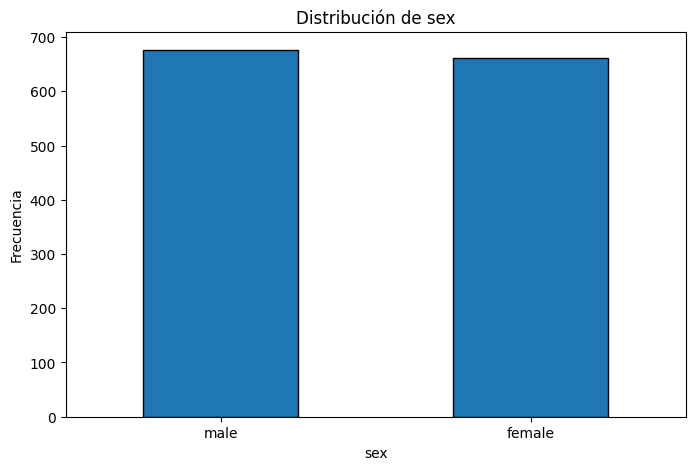

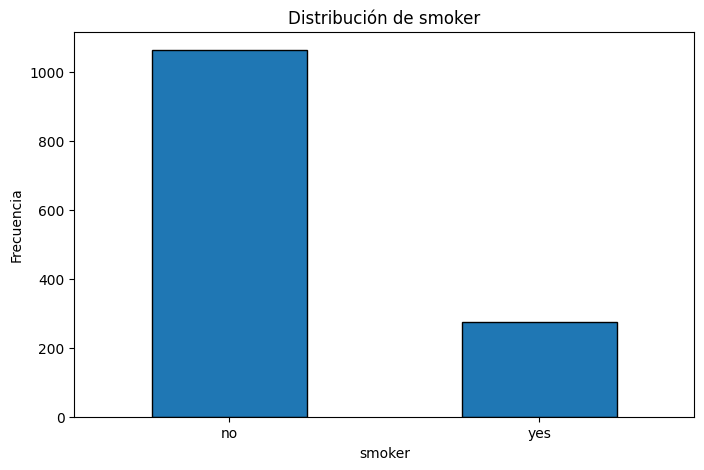

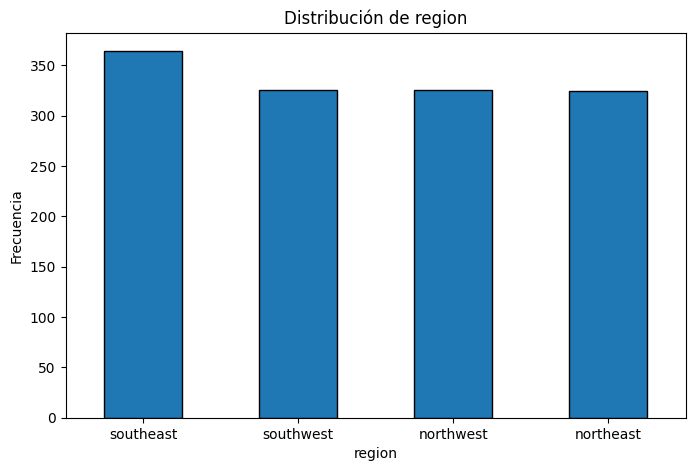

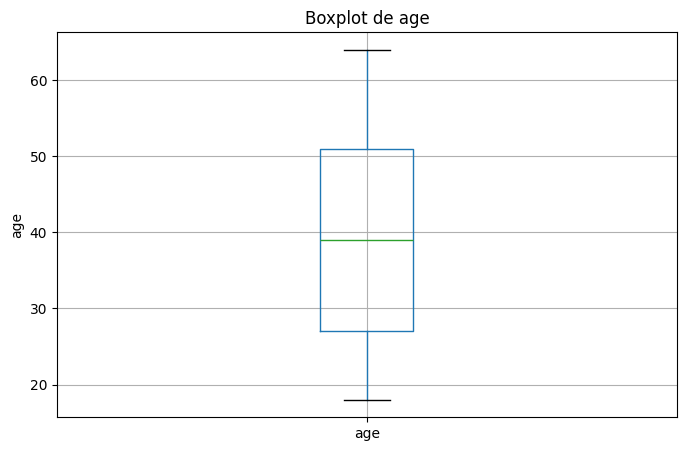

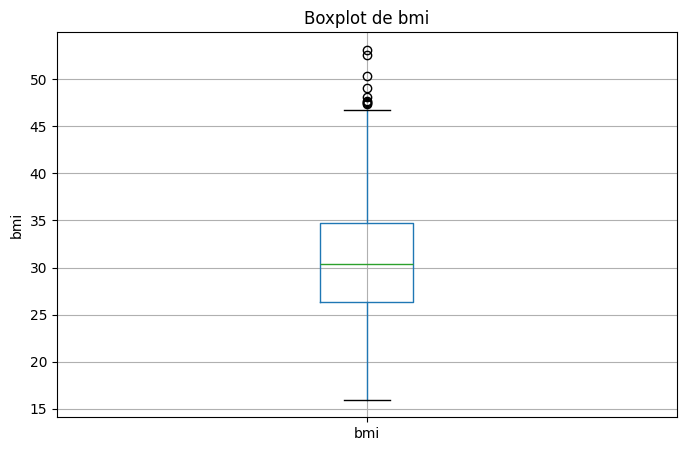

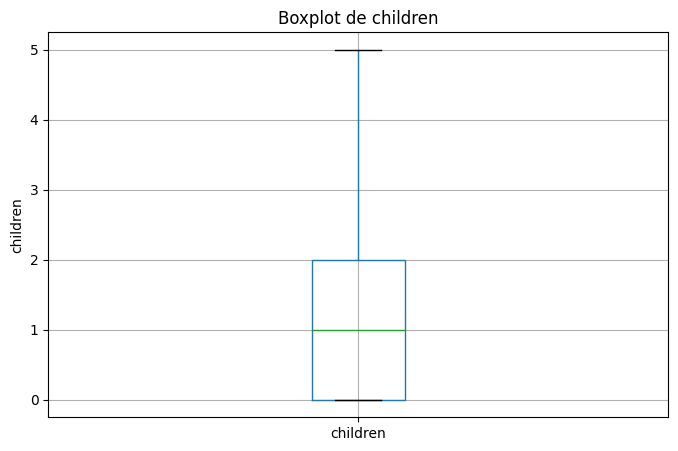

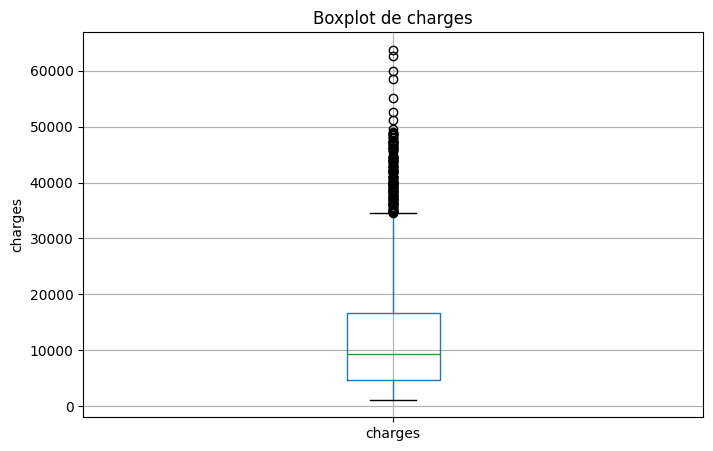

In [35]:
import matplotlib.pyplot as plt

# Seleccionar variables categóricas (tipo 'object' o 'category')
categorical_vars = data.select_dtypes(include=['object', 'category']).columns

# Seleccionar variables numéricas (tipo numérico)
numerical_vars = data.select_dtypes(include=['number']).columns

# Graficar variables categóricas: gráfico de barras de las frecuencias
for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    data[var].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=0)
    plt.show()

# Graficar variables numéricas: boxplot
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=var)
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.show()


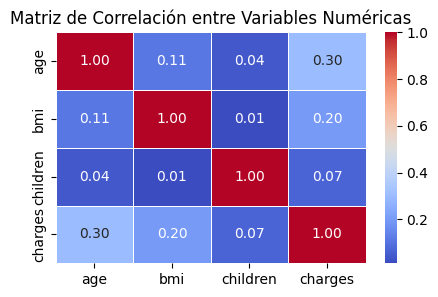

In [36]:
# Matriz de correlación

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
numerical_vars = data.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con variables numéricas
correlation_matrix = numerical_vars.corr()

# Crear un heatmap de correlación
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()



Parece que la edad y el bmi son de las numericas las que mas correlacion tienen con el label

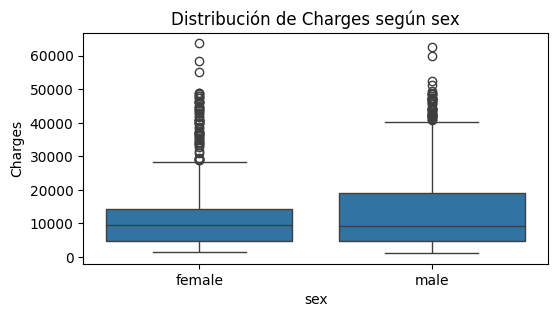

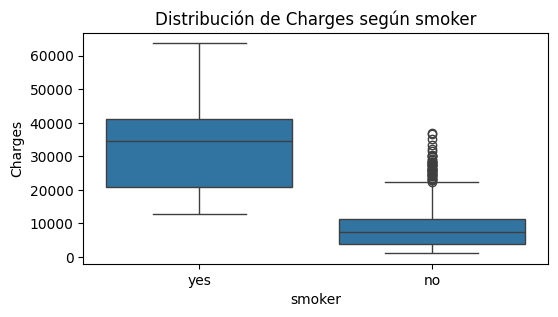

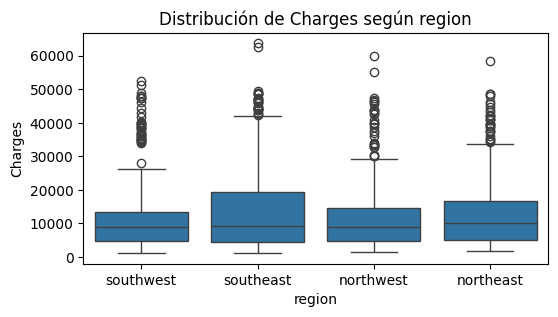

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables categóricas
categorical_vars = ["sex", "smoker", "region"]

# Crear boxplots para comparar cada variable categórica con 'charges'
for var in categorical_vars:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[var], y=data["charges"])
    plt.title(f"Distribución de Charges según {var}")
    plt.xlabel(var)
    plt.ylabel("Charges")
    plt.xticks(rotation=0)
    plt.show()


Se ve claramente que las que más repercusion sobre los cargos es la variable smoker

In [38]:
# Aplicamos la transformación de las variables categóricas
data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
dtypes: bool(5), float64(2), int64(2)
memory usage: 48.5 KB


Ya tenemos todas las features en formato numerico. No hemos normalizado, luego podemos probar a normalizar a ver si mejoran los resultados

## Implementación

In [40]:
# Importamos las librerias de sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, mean_squared_log_error

In [53]:
## A completar
# Dividir el DataFrame en características (X) y variable objetivo (y)
X = data.drop('charges', axis=1)
y = data['charges']

In [42]:
# Dividir los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train.shape, X_test.shape

((1070, 8), (268, 8))

In [44]:
# Entrenar modelos con regresion lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [45]:
# Entrenar modelos con regresion polinomica

# Transformar las características a polinómicas
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = polynomial_transformer.fit_transform(X_train)
X_test_poly = polynomial_transformer.transform(X_test)

# Entrenar el modelo de regresión polinómica
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)

# Realizar predicciones con el modelo polinómico

polynomial_predictions = polynomial_model.predict(X_test_poly)


In [46]:
# Entrenar modelos con regularización L1 (Lasso)
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_test)

In [47]:
# Entrenar modelos con regularización L2 (Ridge)
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_test)

In [48]:
# Entrenar modelos con Elastic Net
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.3)
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)

In [49]:
# Entrenar modelos con Decision Tree
decision_tree = DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)

In [50]:
# Entrenar los modelos con Random Forest
random_forest = RandomForestRegressor(n_estimators=100, max_depth=5)
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)

In [51]:
# Imprimir los errores Mean Absolute Error (MAE)
print(f'MAE Linear: {mean_absolute_error(y_test, linear_predictions)}')
# print(f'MAE Polynomial: {mean_absolute_error(y_test, polynomial_predictions)}')
print(f'MAE Lasso: {mean_absolute_error(y_test, lasso_predictions)}')
print(f'MAE Ridge: {mean_absolute_error(y_test, ridge_predictions)}')
print(f'MAE Elastic Net: {mean_absolute_error(y_test, elastic_net_predictions)}')
print(f'MAE Decision Tree: {mean_absolute_error(y_test, decision_tree_predictions)}')
print(f'MAE Random Forest: {mean_absolute_error(y_test, random_forest_predictions)}')
print('-'*50)

# Evaluar los modelos con Mean Squared Error (MSE)
mse_linear = mean_squared_error(y_test, linear_predictions)
# mse_polynomial = mean_squared_error(y_test, polynomial_predictions)
mse_lasso = mean_squared_error(y_test, lasso_predictions)
mse_ridge = mean_squared_error(y_test, ridge_predictions)
mse_elastic_net = mean_squared_error(y_test, elastic_net_predictions)
mse_decision_tree = mean_squared_error(y_test, decision_tree_predictions)
mse_random_forest = mean_squared_error(y_test, random_forest_predictions)
print('-'*50)


# Imprimir los errores cuadráticos medios (MSE)
print(f'MSE Linear: {mse_linear}')
# print(f'MSE Polynomial: {mse_polynomial}')
print(f'MSE Lasso: {mse_lasso}')
print(f'MSE Ridge: {mse_ridge}')
print(f'MSE Elastic Net: {mse_elastic_net}')
print(f'MSE Decision Tree: {mse_decision_tree}')
print(f'MSE Random Forest: {mse_random_forest}')
print('-'*50)
# Imprimir los errores Root Mean Squared Error (RMSE)
print(f'RMSE Linear: {mse_linear**0.5}')
# print(f'RMSE Polynomial: {mse_polynomial**0.5}')
print(f'RMSE Lasso: {mse_lasso**0.5}')
print(f'RMSE Ridge: {mse_ridge**0.5}')
print(f'RMSE Elastic Net: {mse_elastic_net**0.5}')
print(f'RMSE Decision Tree: {mse_decision_tree**0.5}')
print(f'RMSE Random Forest: {mse_random_forest**0.5}')
print('-'*50)

# Imprimir los errores Root Mean Squared Log Error (RMSLE)
# Función para calcular RMSLE correctamente
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, np.maximum(y_pred, 0)))  # Evitar valores negativos en predicciones

# Imprimir RMSLE para cada modelo
print(f'RMSLE Linear: {rmsle(y_test, linear_predictions)}')
# print(f'RMSLE Polynomial: {rmsle(y_test, polynomial_predictions)}')
print(f'RMSLE Lasso: {rmsle(y_test, lasso_predictions)}')
print(f'RMSLE Ridge: {rmsle(y_test, ridge_predictions)}')
print(f'RMSLE Elastic Net: {rmsle(y_test, elastic_net_predictions)}')
print(f'RMSLE Decision Tree: {rmsle(y_test, decision_tree_predictions)}')
print(f'RMSLE Random Forest: {rmsle(y_test, random_forest_predictions)}')
print('-'*50)

# Imprimir los errores R2 

print(f'R2 Linear: {linear_model.score(X_test, y_test)}')
# print(f'R2 Polynomial: {polynomial_model.score(X_test, y_test)}')
print(f'R2 Lasso: {lasso_reg.score(X_test, y_test)}')
print(f'R2 Ridge: {ridge_reg.score(X_test, y_test)}')
print(f'R2 Elastic Net: {elastic_net.score(X_test, y_test)}')
print(f'R2 Decision Tree: {decision_tree.score(X_test, y_test)}')
print(f'R2 Random Forest: {random_forest.score(X_test, y_test)}')
print('-'*50)

# Imprimir los errores R2 ajustado
print(f'R2 ajustado Linear: {1 - (1-linear_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
# print(f'R2 ajustado Polynomial: {1 - (1-polynomial_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'R2 ajustado Lasso: {1 - (1-lasso_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'R2 ajustado Ridge: {1 - (1-ridge_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'R2 ajustado Elastic Net: {1 - (1-elastic_net.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'R2 ajustado Decision Tree: {1 - (1-decision_tree.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print(f'R2 ajustado Random Forest: {1 - (1-random_forest.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
print('-'*50)

# Imprimir los errores MAPE
print(f'MAPE Linear: {mean_absolute_percentage_error(y_test, linear_predictions)}')
# print(f'MAPE Polynomial: {mean_absolute_percentage_error(y_test, polynomial_predictions)}')
print(f'MAPE Lasso: {mean_absolute_percentage_error(y_test, lasso_predictions)}')
print(f'MAPE Ridge: {mean_absolute_percentage_error(y_test, ridge_predictions)}')
print(f'MAPE Elastic Net: {mean_absolute_percentage_error(y_test, elastic_net_predictions)}')
print(f'MAPE Decision Tree: {mean_absolute_percentage_error(y_test, decision_tree_predictions)}')
print(f'MAPE Random Forest: {mean_absolute_percentage_error(y_test, random_forest_predictions)}')

MAE Linear: 4181.194473753649
MAE Lasso: 4181.31763185589
MAE Ridge: 4182.428134240747
MAE Elastic Net: 4190.470970322809
MAE Decision Tree: 2930.7675712410432
MAE Random Forest: 2558.905610463312
--------------------------------------------------
--------------------------------------------------
MSE Linear: 33596915.85136145
MSE Lasso: 33597770.054583974
MSE Ridge: 33601489.86482401
MSE Elastic Net: 33632467.79117218
MSE Decision Tree: 25831862.599857908
MSE Random Forest: 19754563.83787683
--------------------------------------------------
RMSE Linear: 5796.284659276273
RMSE Lasso: 5796.358344217857
RMSE Ridge: 5796.679210101592
RMSE Elastic Net: 5799.350635301523
RMSE Decision Tree: 5082.505543514725
RMSE Random Forest: 4444.6106508756
--------------------------------------------------
RMSLE Linear: 1.0683606396039087
RMSLE Lasso: 1.0683429325202027
RMSLE Ridge: 1.0682292298507527
RMSLE Elastic Net: 1.0674578307789122
RMSLE Decision Tree: 0.4311496306651408
RMSLE Random Forest: 0.4

# Conclusiones

* MAE (Error Absoluto Medio) → Mide cuánto se equivoca el modelo en promedio, sin importar si es mucho o poco.
* MSE (Error Cuadrático Medio) → Similar a MAE, pero da más importancia a los errores grandes.
* RMSE (Raíz del Error Cuadrático Medio) → Es como el MSE, pero en la misma unidad que el label, más fácil de interpretar.
* RMSLE (Raíz del Error Cuadrático Logarítmico Medio) → Similar a RMSE, pero reduce el impacto de valores muy grandes o muy pequeños.
* R² (Coeficiente de Determinación) → Proporciona una medida de cuanto la variabilidad de y es explicada por el modelo en comparación con la variabilidad total de los datos. Si es cercano a 1, el modelo es bueno.
* R² Ajustado → Igual que R², pero penaliza si agregamos variables innecesarias.
* MAPE (Error Absoluto Porcentual Medio) → Mide el error en porcentaje, útil si quieres comparar errores en distintas escalas.

Podemos ver que los modelos que mejor funcionan son el RandomForest y el DecisionTree, ya que en todos los errores se obtiene un mejor resultado. La diferencia entre R2 y R2 ajustado es muy poca, por lo que nos indica que la cantidad de features que tenemos es correcta. Los modelos Linear, Lasso, Ridge y Elastic tiene un desempeño muy similiar. Probando a normalizar las variables podríamos llegar a mejorar los resultados. El RMSE en RandomForest nos indica que solo oscilaria unos 4400 sobre los charges